# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(include=['float64','int64'])




,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
5,6,0.0,3,23.926502,0,0,8.4583
6,7,0.0,1,54.000000,0,0,51.8625
7,8,0.0,3,2.000000,3,1,21.0750
8,9,1.0,3,27.000000,0,2,11.1333
9,10,1.0,2,14.000000,1,0,30.0708


In [5]:
#your code here- categorical variable
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
5,"Moran, Mr. James",male,330877,U0,Q
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
7,"Palsson, Master. Gosta Leonard",male,349909,U0,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,U0,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,U0,C


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

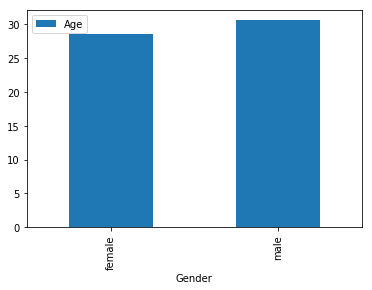

In [6]:
import matplotlib.style
def analyze(df):
    df=df.groupby(['Gender'])['Age'].mean().reset_index()
    df=df[['Gender','Age']]
    return df
titanic1= analyze(titanic)
titanic1
axes = figsize=(12,6)
axes= titanic1.style.use('classic')
axes= titanic1.plot.bar(x="Gender", y=["Age"])

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([ 51.,  21.,  25.,  53., 123., 203., 178., 169., 150.,  70.,  68.,
         68.,  47.,  28.,  21.,  21.,   5.,   5.,   2.,   1.]),
 array([ 0.17  ,  4.1615,  8.153 , 12.1445, 16.136 , 20.1275, 24.119 ,
        28.1105, 32.102 , 36.0935, 40.085 , 44.0765, 48.068 , 52.0595,
        56.051 , 60.0425, 64.034 , 68.0255, 72.017 , 76.0085, 80.    ]),
 <a list of 20 Patch objects>)

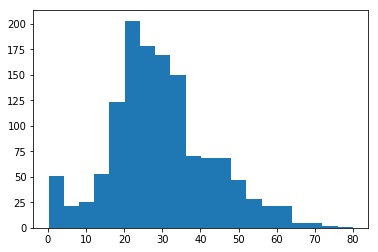

In [7]:
plt.hist(titanic["Age"], 20)



#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

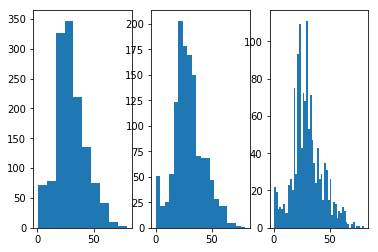

In [8]:
num_cortes = [10,20,50]
figsize=(4,5)
plt.subplot(131)
plt.hist(titanic["Age"],num_cortes[0])
plt.subplot(132)
plt.hist(titanic["Age"],num_cortes[1])
plt.subplot(133)
plt.hist(titanic["Age"],num_cortes[2])

#### Whether the bin size affects your plot? Why?

#your comment here
si, porque hace que se pierdan los datos intermedios 

#### Use seaborn to show the distribution of the column `Age`

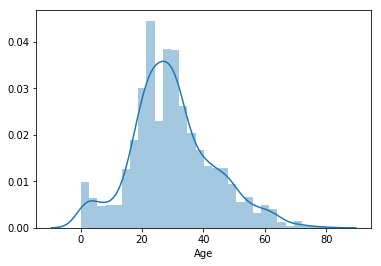

In [9]:
# your code here
sns.distplot(titanic["Age"])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

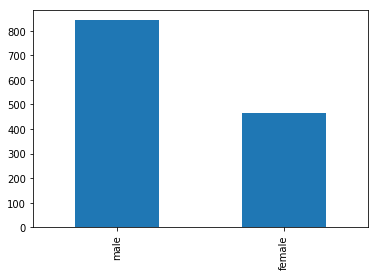

In [10]:
# your code here- 1st way
resultados=titanic["Gender"].value_counts()
resultados.plot.bar()

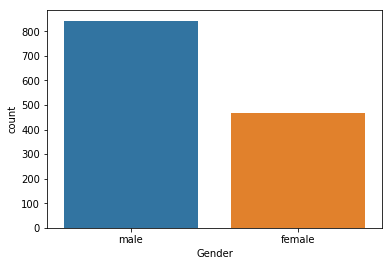

In [11]:
# your code here- 2nd way
sns.countplot(titanic["Gender"])

#### Use the appropriate plot to visualize the column `Pclass` 


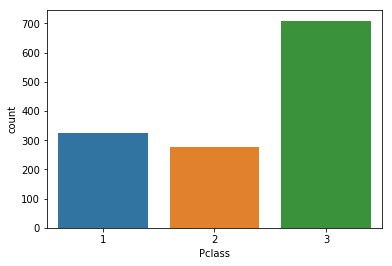

In [12]:
sns.countplot(titanic["Pclass"])


#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64


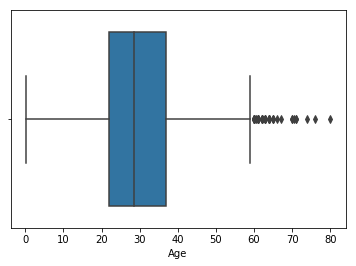

In [13]:
a= titanic["Age"].describe()
print(a)
sns.boxplot(titanic["Age"])


#### What does the previous plot tell you about the feature `Age`? Comment.


que el 50% de la población tenía una edad entre 22 y 37 años, por lo que era una población joven, de hecho las edades de mas de 60 años se consideran atípicas 

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

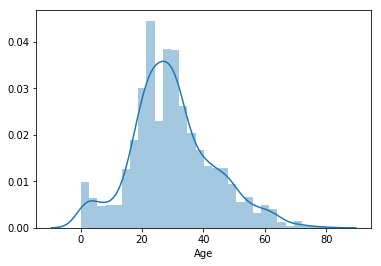

In [14]:

sns.distplot(titanic["Age"])

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

#your comment here
Ayuda a conocer la distribucción de la edad, por ejemplo en este caso se puede ver como en la franja de 30 años baja el numero de la población con respecto a las otras franjas

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

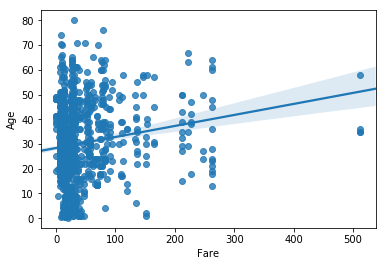

In [15]:
#your code-1st way
sns.regplot(titanic["Fare"],titanic["Age"])

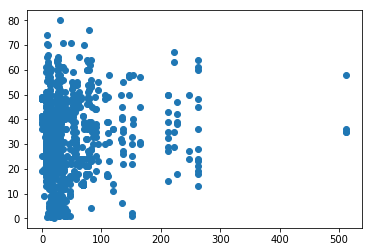

In [16]:
# your code-2nd way
plt.scatter(titanic["Fare"],titanic["Age"])

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

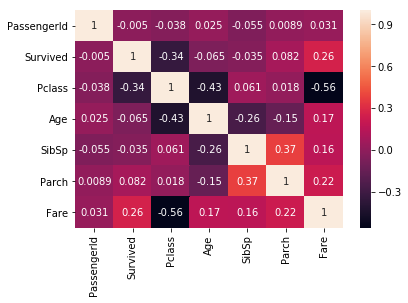

In [17]:
#your code here
sns.heatmap(titanic.corr(),annot=True)

#### According to the previous plot, what are the most correlated feature? Comment.

las variables que mas relacion tienen son el pasaje con la clase de la persona, la edad con la clase y la clase con la superviviencia


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

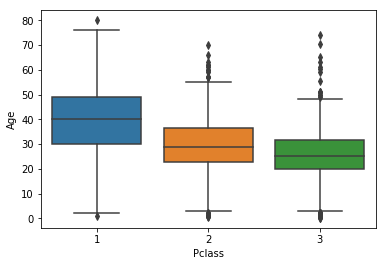

In [18]:
#your code here
sns.boxplot(titanic["Pclass"],titanic["Age"])

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

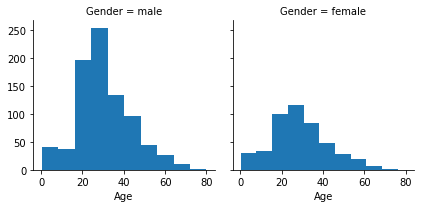

In [19]:
#your code here)
a = sns.FacetGrid(data = titanic, col="Gender")
a.map(plt.hist, "Age")